# **Samuel Vasco Gonzalez.** CC 1152223665

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install fitter

     |████████████████████████████████| 47 kB 2.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=51d153593bb65931fda60c9aaa7abacd474e498b361b596d4f92751c6f5f0747
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=f9a045ff85d57f82dce6e4898ecfb147c3de383e3a1a78104d41850d7c4d8218
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [3]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy import stats
from fitter import Fitter
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tabulate import tabulate

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Neural_Network_Course/Homework 7/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploración de Datos

###Inspección de datos

* "id": Numero de identificacion de la vivienda
* "Date": Fecha en que se vendió la casa
* "Price": el precio es el objetivo de predicción
* "Bedrooms": Número de Dormitorios/Casa
* "Bathrooms": Número de baños/Casa
* "Sqft_Living": pies cuadrados de la casa
* "Sqft_Lot": pies cuadrados del lote
* "Floors": Total de pisos oniveles) en casa
* "Waterfront": Casa que tiene vista a la costanera
* "View": Ha sido visto
* "Condition": Qué tan buena es la condición ogeneral)
* "Grade": calificación de vivienda, según el sistema del condado de King
* "Sqft_above": pies cuadrados de la casa aparte del sótano
* "Sqft_Basement": pies cuadrados del sótano
* "Yr_Built": año de construcción
* "Yr_Renovated": año en que se renovó la casa
* "Zipcode": código postal
* "Lat": Coordenada de latitud
* "Long": Coordenada de longitud
* "Sqft_Living15": Área de la sala de estar en 2015 oimplica algunas renovaciones)
* "Sqft_Lot15": área del tamaño del lote en 2015 oimplica algunas renovaciones) 

In [6]:
data.shape

(21615, 21)

Tenemos un dataset con 21615 observaciones, 20 predictores y 1 variable objetivo.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21615 non-null  int64  
 4   bathrooms      21615 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21614 non-null  float64
 7   floors         21615 non-null  float64
 8   waterfront     21615 non-null  int64  
 9   view           21615 non-null  int64  
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21615 non-null  int64  
 16  zipcode        21615 non-null  int64  
 17  lat            21615 non-null  float64
 18  long  

Información del tipos de variable que es cada predictor o característica. 

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161500e+04,2.161500e+04,21615.000000,21615.000000,21615.000000,2.161400e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579945e+09,5.400672e+05,3.370807,2.114724,2079.874763,1.511002e+04,1.494263,0.007541,0.234282,3.409577,7.656812,1788.337173,291.537590,1971.005968,84.394448,98077.936109,47.560039,-122.213873,1986.521351,12779.768864
std,2.876672e+09,3.671167e+05,0.930026,0.770136,918.402073,4.142026e+04,0.539985,0.086513,0.766285,0.650893,1.175421,828.071354,442.564514,29.372179,401.661476,53.503930,0.138565,0.140843,685.367239,27328.234764
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Análisis de los datos usando estadística descriptiva.

###Eliminación de filas de datos repetidos y NaN.

In [9]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
99,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
100,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [10]:
data=data.drop(99,axis=0)

Encontramos dos valores duplicados y eliminamos uno de ellos.

In [11]:
# Número de datos ausentes por variable
# ==============================================================================
val_nul=data.isna().sum().sort_values()
v=list(val_nul)
print(val_nul)
print(f"El número total de valores ausentes en todo el dataset es: {sum(v)}")

#Eliminacion de filas con valores NaN
data=data.dropna(axis=0)

id               0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
sqft_living15    0
condition        0
waterfront       0
floors           0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
date             0
view             0
sqft_lot15       0
sqft_lot         1
dtype: int64
El número total de valores ausentes en todo el dataset es: 1


Identificamos y eliminamos la fila del dataset que tiene un valor NaN en sqft_lot (pies cuadrados del lote).

### Correlación entre las diferentes características y eliminación de aquellas que presenten alta colinealidad.

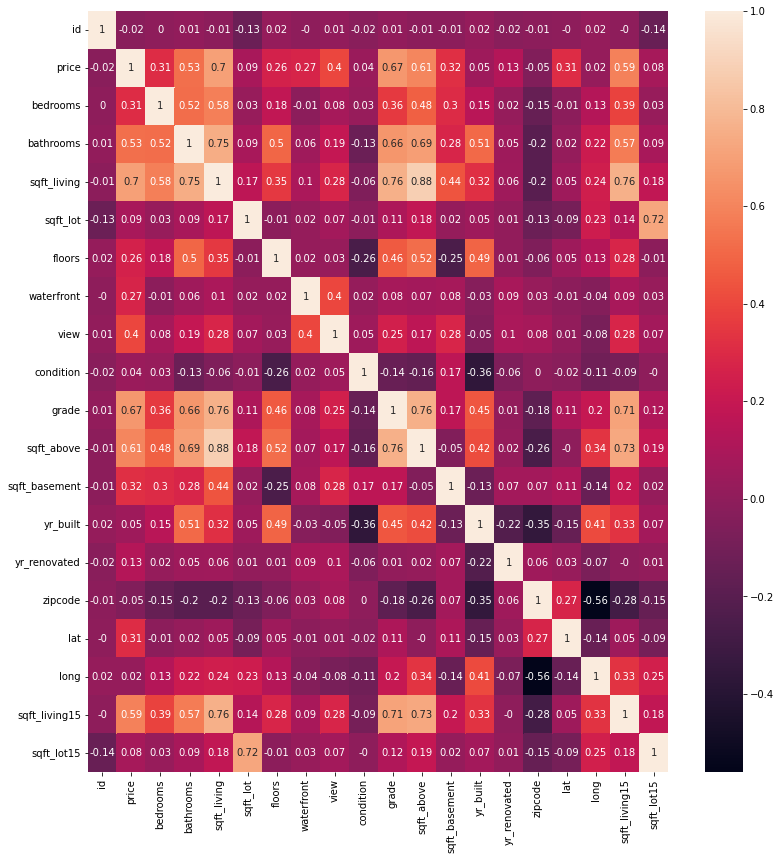

In [12]:
plt.figure(figsize=(13,14))
correlation_matrix = data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)

Luego de comprobar la correlación entre variables, vamos a eliminar las que tengan una correlación superior a 0.8, por lo tanto $sqft$ _ $above$ y $sqft$ _ $living$ al tener una correlación de $0.88$, procedemos a eliminar una de ellas, pues su alto grado de colinealidad afectaría el modelo de regresión lineal. Eliminaremos $sqft$ _ $above$ que significa pies cuadrados de la casa aparte del sótano.

Además, las características $id$ y $zipcode$ no son de interés, pues se refieren al Numero de identificacion de la vivienda y al código postal respectivamente, esto se ve reflejado en su baja correlación con la variable objetivo $price$ del $-0.02$ y $-0.05$ respectivamente, ambas muy cercanas a cero. Por lo tanto estas características también se eliminarán.  

In [13]:
data=data.drop(['sqft_above', 'id', 'zipcode'], axis=1)

### Eliminación de Outliers o valores atípicos

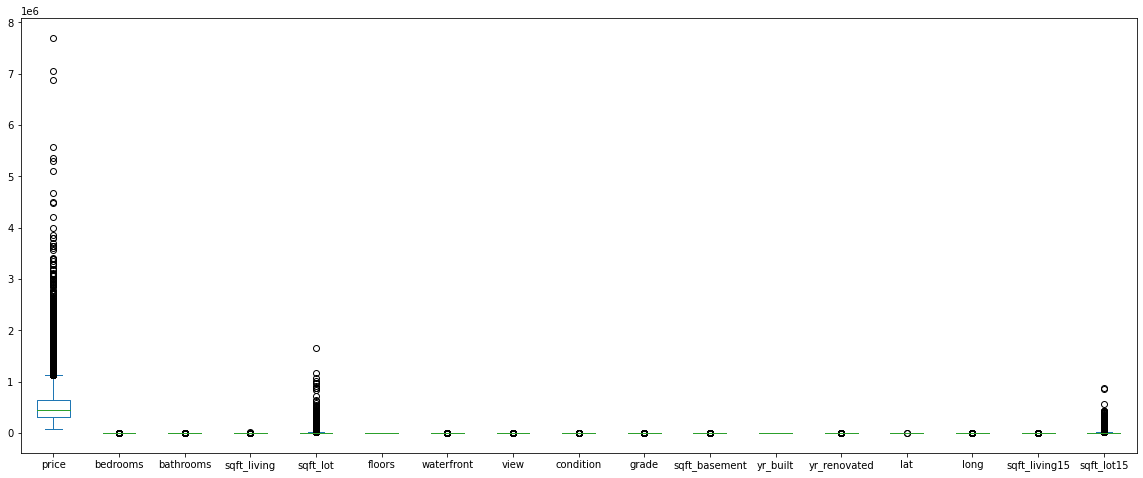

In [14]:
data.plot(kind='box', figsize=(20,8))

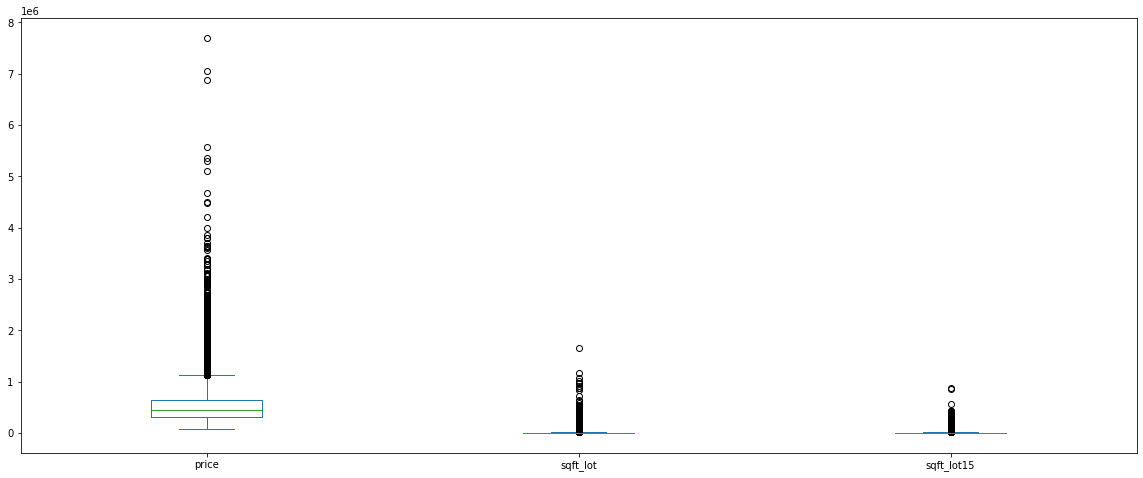

In [15]:
data[["price","sqft_lot","sqft_lot15"]].plot(kind='box', figsize=(20,8))

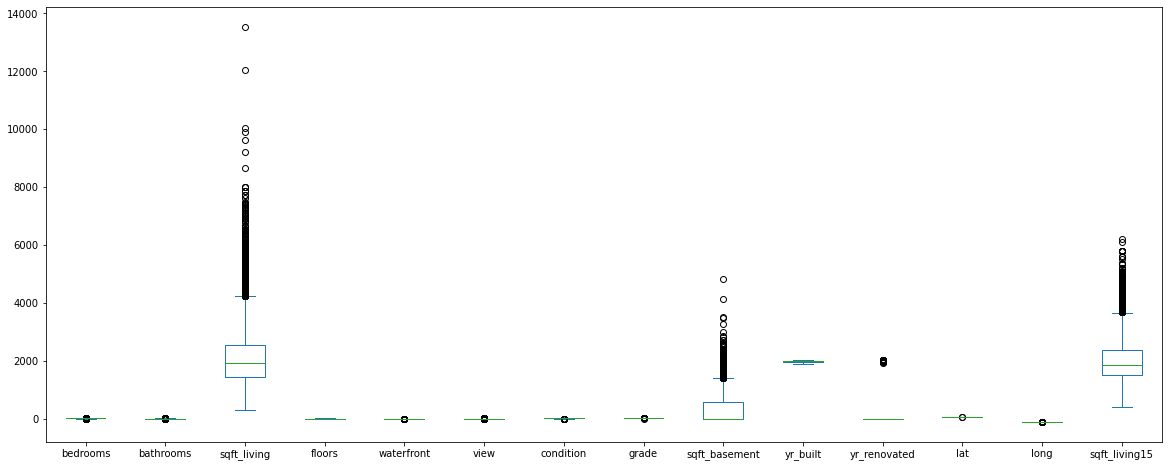

In [16]:
data[["bedrooms","bathrooms","sqft_living","floors","waterfront","view","condition","grade","sqft_basement","yr_built","yr_renovated",
      "lat","long","sqft_living15"]].plot(kind='box', figsize=(20,8))

Por medio del diagrama de cajas podemos visualizar la presencia de outliers, pero esto se tratará usando Normalización Z-score, a simple vista podemos estar engañados.

#### Normalización Z-score

 Aprovechamos la Normalización Z-score para la eliminación de outliers, valores mas allá de las 3 desviaciones estandar.
 


Búsqueda y eliminación de outliers

In [17]:
#se convierta columna date en formato de fecha aa-mm-dd
data['date']=pd.to_datetime(data['date'])

#creacion de nuevas columnas correspondientes a año, mes, dia
data['year']=pd.DatetimeIndex(data['date']).year
data['month']=pd.DatetimeIndex(data['date']).month
data['day']=pd.DatetimeIndex(data['date']).day

#se cambian los indices por fechas
data.set_index('date',inplace=True)

In [18]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
2014-06-23,402101.0,2,0.75,1020,1350.0,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23


In [19]:
#Normalizacion Z-Score para 3 desviaciones estandar
std_dev = 3
new_data=stats.zscore(data)

print("Cantidad de observaciones del dataset: ",data.shape[0],"\n")

#busqueda de outliers a 3 desviaciones estandar
outliers = (np.abs(new_data) > std_dev).any(axis=1)
data_limpio=data[~outliers] #dataframe sin normalizar quitando outliers encontrados 

print("Cantidad de observaciones calificadas como outliers luego de aplicar regla de las ",std_dev," desviaciones estándar: ",data[outliers].shape[0],"\n")
print("Cantidad de observaciones del dataset luego de quitar los outliers: ",data_limpio.shape[0],"\n")


Cantidad de observaciones del dataset:  21613 

Cantidad de observaciones calificadas como outliers luego de aplicar regla de las  3  desviaciones estándar:  2884 

Cantidad de observaciones del dataset luego de quitar los outliers:  18729 



##### Estudio de la Distribución de los Predictores y la Variable Objetivo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ecf0f8c10>,
      dtype=object)

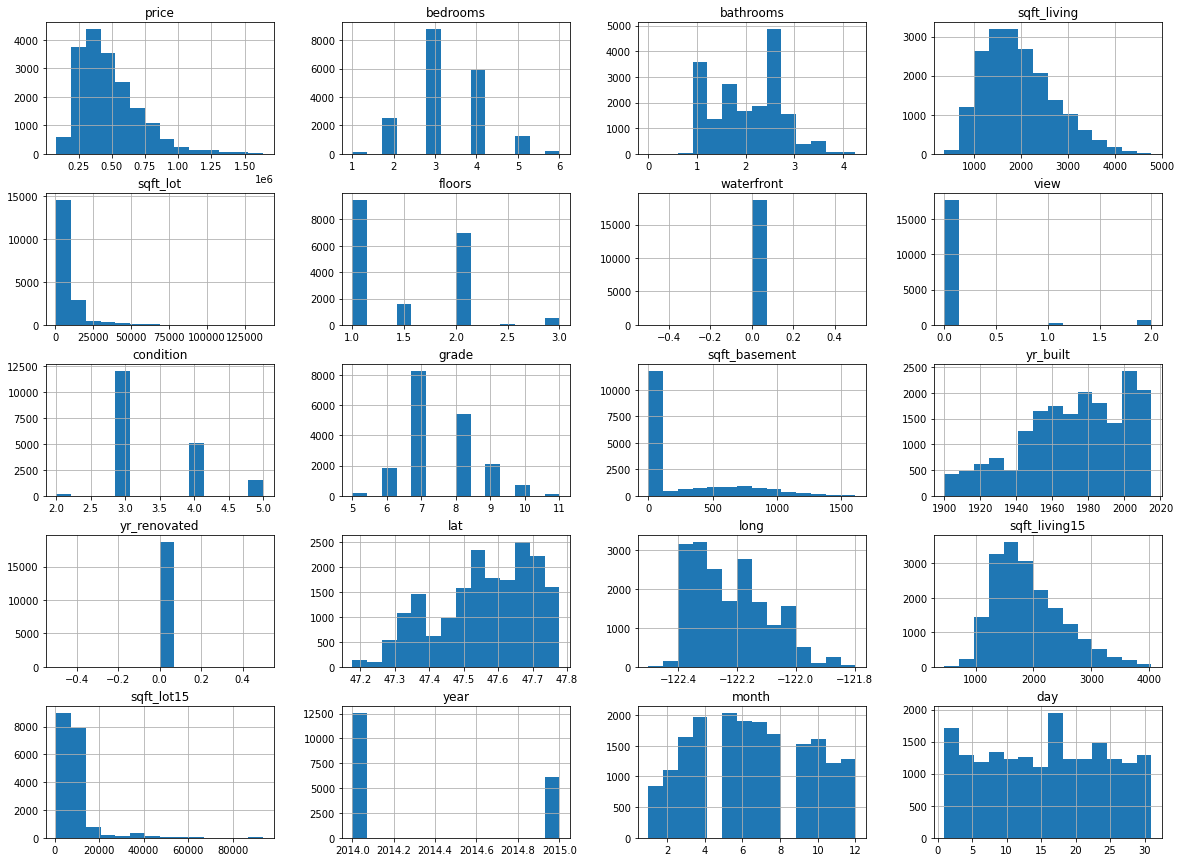

In [20]:
data_limpio.hist(figsize=(20,15),bins=14) 

Analizando la distribución de la variable objetivo $price$ de acuerdo a los histogramas, podemos inferir que a simple vista tiene tendencia de una distribución normal desplazada a la izquierda.

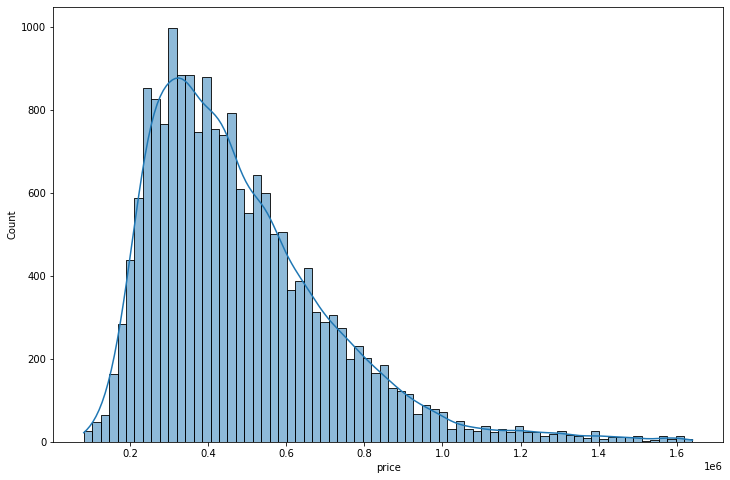

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(data=data_limpio["price"], kde=True)

{'johnsonsb': {'a': 5.006808347976124,
  'b': 1.8543756890575565,
  'loc': 30700.076499890107,
  'scale': 6389776.684273583}}

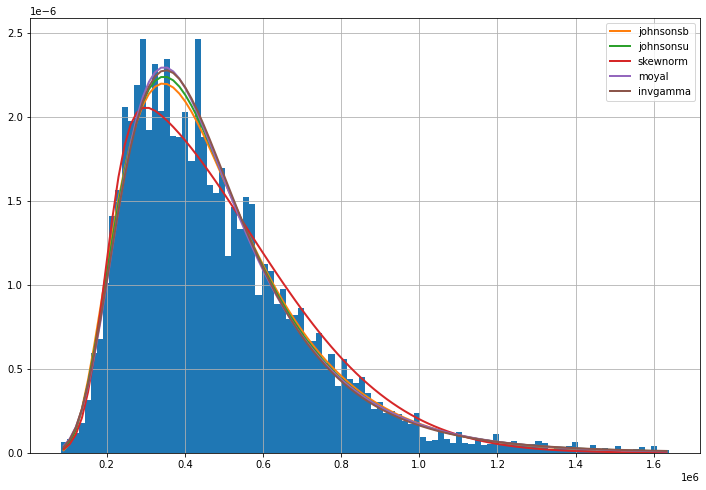

In [22]:
plt.figure(figsize=(12,8))
f=Fitter(np.array(data_limpio['price']), xmin=None, xmax=None, bins=100, distributions=None, timeout=10)
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

En la gráfica encontramos las 5 distribuciones que mejor se ajustan a los datos de la variable objetivo $price$ y por medio del método "$.get$_$best$"  de la librería  fitter.Fitter podemos ver la mejor distribución que se ajusta a los datos.

**La Distribución de Johnson** es la que mejor se ajusta los datos de la variable objetivo "$price$". Esta distribución se ha utilizado con éxito para modelar la rentabilidad de los activos para la gestión de carteras. Las distribuciones de Johnson también se utilizan a veces para modelar el precio de las opciones (compra o venta), para adaptarse a una sonrisa de volatilidad observada. Árbol binomial de Johnson. (Tomado de [Johnson's SU-distribution](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution))

La Distribución de Johnson se puede transformar en una distribución normal usando funciones elementales. Esto da cuenta de la tendencia normal de la variable objetivo.

La Distribución de Johnson contiene un parámetro de umbral, $θ$, y un parámetro de escala, $σ > 0$. Curiosamente, si $σ=1$ y $θ=0$, entonces esta es la transformación logística. Entonces, una forma de obtener un miembro del sistema de Johnson es como una transformación logística de una variable aleatoria normal.

Fue necesario realizar una Normalización o Estandarización de los datos, pues usaremos específicamente un modelo de Red Neuronal de Regresión Lineal Regularizado, el cual exije que la variable objetivo tenga distribución de tipo normal y además que los datos estén normalizados para garantizar una mejor convergencia del modelo.

### División del dataset en Train y Test

 #### StandardScaler
 Para transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

Además, dado que los métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

In [23]:


# División de los datos en train y test
# ==============================================================================
X = data_limpio.drop(columns=['price']).values
y = data_limpio['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                  random_state=43,shuffle=True)

#ESTANDARIZACION
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


#### Neural Network Model

In [41]:
def get_regularized_model(input_shape,wd):
    model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=64,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=32,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=16,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=8,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=1,activation='linear')                 
  ])
    return model

def compile_model(model):
        model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mape'])

#### Summary

In [42]:
#DATOS SIN ESTANDARIZADOS
model = get_regularized_model(X_train[0].shape,1e-3)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1280      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


####Compile the model

In [43]:
compile_model(model)

#### Fitting the model

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.15, verbose=0, callbacks=[early_stop])

Epoch 39: early stopping


#### Evaluating the model

In [45]:
model.evaluate(X_test,y_test)

176/176 [==============================] - 5s 30ms/step - loss: 15053175808.0000 - mape: 18.0758


[15053175808.0, 18.075763702392578]

#### Visualizating the performance of the model

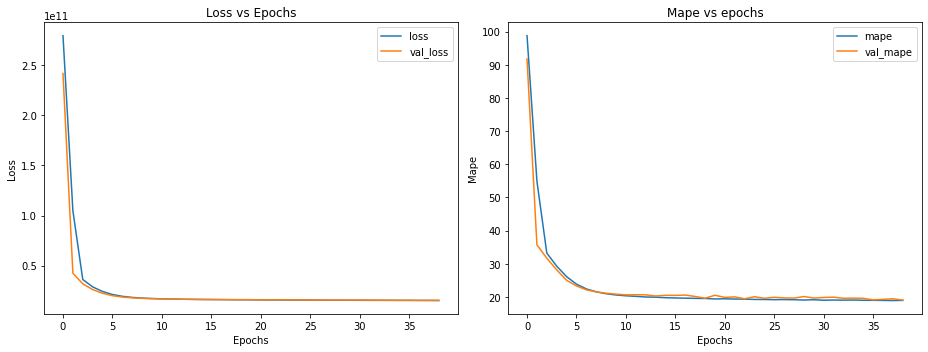

In [46]:
fig, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(history.history['loss'],label='loss')
axs[0].plot(history.history['val_loss'],label='val_loss')
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title('Loss vs Epochs')
axs[0].legend()
axs[1].plot(history.history['mape'],label='mape')
axs[1].plot(history.history['val_mape'],label='val_mape')
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Mape")
axs[1].set_title('Mape vs epochs')
axs[1].legend()
plt.tight_layout()

### Now we do the predictions and print the metric R2

In [47]:
# Predicciones 
# ==============================================================================
y_pred = model.predict(X_test)

#Metric R2
#===============================================================================
print("The R2 Score for Test set is: {:.4} \n".format(r2_score(y_test, y_pred)))

The R2 Score for Test set is: 0.7256 



In [49]:
random=np.random.randint(len(y_test), size=10)
random_True=[]
random_pred=[]
for i in random:
  random_True.append(y_test[i])
  random_pred.append(y_pred[i])


dict={"Digit True":random_True, "Digit Predict":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 

╒══════════════╤═════════════════╕
│   Digit True │   Digit Predict │
╞══════════════╪═════════════════╡
│       572500 │          609569 │
├──────────────┼─────────────────┤
│       820000 │          930713 │
├──────────────┼─────────────────┤
│       250000 │          249269 │
├──────────────┼─────────────────┤
│       315000 │          339089 │
├──────────────┼─────────────────┤
│       330000 │          358091 │
├──────────────┼─────────────────┤
│       895000 │          614170 │
├──────────────┼─────────────────┤
│       595000 │          582977 │
├──────────────┼─────────────────┤
│       360000 │          477036 │
├──────────────┼─────────────────┤
│       336500 │          276196 │
├──────────────┼─────────────────┤
│       605000 │          631144 │
╘══════════════╧═════════════════╛


#### Se obtuvo una precisión R2 de $72.56$% en el modelo de Regresión Lineal usando una Red Neuronal profunda de 5 capas. Este modelo presenta una precisión buena a la hora de predecir el precio de una casa teniendo en cuanta factores como: 

* Fecha en que se vendió
* Número de Dormitorios
* número de baños
* Pies cuadrados de la casa
* Pies cuadrados del lote
* Total de pisos (niveles) en la casa
* Número de veces que ha sido vista
* Estado general de la casa
* Grado dado a la unidad de vivienda, basado en el sistema de clasificación del condado de King
* Año de construcción

Cabe recalcar que la precisión de la Red Neuronal puede mejorarse haciendo un escalado más cuidadoso de los datos, es decir, discriminando qué características necesitan ser escaladas y qué características no.